In [65]:
import sys
#Change path specificly to your directories
sys.path.insert(1, '/home/fishial/Fishial/Object-Detection-Model')

from module.segmentation_package.src.utils import read_json
from module.segmentation_package.src.utils import get_dataset_dicts
from module.segmentation_package.src.utils import get_prepared_data

from detectron2.data import MetadataCatalog
from detectron2.data import DatasetCatalog

from detectron2.config import get_cfg
import numpy as np

from detectron2.engine import DefaultPredictor
import cv2
import matplotlib.pyplot as plt

In [102]:
path_to_file = r'/home/fishial/Fishial/output/amp_on/02_11_2022_11_44_11/coco_eval.json'
json_f = read_json(path_to_file)

In [103]:
total_sum = 0
top_id = None
for i in json_f:
    tmp_sum = 0
    for z in json_f[i]['segm']:
        if np.isnan(json_f[i]['segm'][z]):continue
        tmp_sum += json_f[i]['segm'][z]
    if tmp_sum > total_sum:
        total_sum = tmp_sum
        top_id = i

print(top_id, json_f[top_id])

10000 {'segm': {'AP': 92.25373139122415, 'AP50': 95.78029512141669, 'AP75': 94.79273370099608, 'APs': nan, 'APm': 57.04895947979606, 'APl': 92.47717130589692}}


In [46]:
np.isnan(json_f['10000']['segm']['APs'])

True

In [50]:
json_f

{'10000': {'segm': {'AP': 92.22608870560354,
   'AP50': 95.36548147140616,
   'AP75': 94.36794957303427,
   'APs': nan,
   'APm': 60.59900942653438,
   'APl': 92.26117693656172}},
 '20000': {'segm': {'AP': 92.37421789926059,
   'AP50': 95.36963177613124,
   'AP75': 95.12265317042828,
   'APs': nan,
   'APm': 60.37137067509809,
   'APl': 92.57218276831637}},
 '30000': {'segm': {'AP': 92.26730906421619,
   'AP50': 95.94753860741484,
   'AP75': 94.88258579675353,
   'APs': nan,
   'APm': 60.084341297416856,
   'APl': 92.54453476859779}},
 '40000': {'segm': {'AP': 92.33915651064747,
   'AP50': 95.34830707183858,
   'AP75': 95.13470554486409,
   'APs': nan,
   'APm': 60.50337266744344,
   'APl': 92.46013835493254}},
 '50000': {'segm': {'AP': 92.18418115247272,
   'AP50': 95.35923821139039,
   'AP75': 94.34795555177944,
   'APs': nan,
   'APm': 58.524387881632656,
   'APl': 92.31572634653872}},
 '60000': {'segm': {'AP': 92.48501351827339,
   'AP50': 95.53917576386043,
   'AP75': 94.553503955

In [51]:
import detectron2
print(detectron2.__path__)

['/home/fishial/miniconda3/envs/detectron2_env/lib/python3.6/site-packages/detectron2']


In [57]:
from detectron2.modeling import build_model
import torch

In [53]:
config_path = "/home/fishial/Fishial/detectron2/projects/PointRend/configs/InstanceSegmentation/pointrend_rcnn_R_50_FPN_3x_coco.yaml"


cfg = get_cfg()
add_pointrend_config(cfg)

cfg.merge_from_file(config_path)
cfg.MODEL.POINT_HEAD.NUM_CLASSES = 1
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.WEIGHTS = "/home/fishial/Fishial/saved_models/point_rend_top_fish.pth"

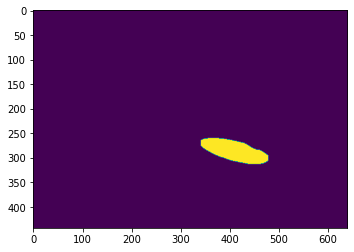

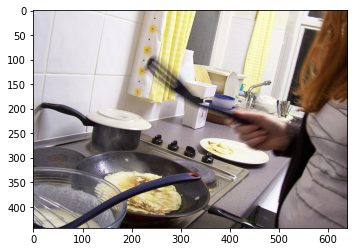

In [81]:

pred = DefaultPredictor(cfg)
pred.model.load_state_dict(trainer.model.state_dict())

inputs = cv2.imread(r'/home/fishial/Fishial/dataset/coco_val2017/000000580294.jpg')
outputs = pred(inputs)
mask = outputs['instances'].pred_masks[0].detach().cpu().numpy()
plt.imshow(mask)
plt.show()
plt.imshow(cv2.cvtColor(inputs,  cv2.COLOR_BGR2RGB))
plt.show()

In [80]:
print(cfg.dump())

CUDNN_BENCHMARK: false
DATALOADER:
  ASPECT_RATIO_GROUPING: true
  FILTER_EMPTY_ANNOTATIONS: true
  NUM_WORKERS: 4
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: []
  PROPOSAL_FILES_TRAIN: []
  TEST:
  - coco_2017_val
  TRAIN:
  - coco_2017_train
GLOBAL:
  HACK: 1.0
INPUT:
  COLOR_AUG_SSD: false
  CROP:
    ENABLED: false
    SINGLE_CATEGORY_MAX_AREA: 1.0
    SIZE:
    - 0.9
    - 0.9
    TYPE: relative_range
  FORMAT: BGR
  MASK_FORMAT: bitmask
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN:
  - 640
  - 672
  - 704
  - 736
  - 768
  - 800
  MIN_SIZE_TRAIN_SAMPLING: choice
  RANDOM_FLIP: horizontal
MODEL:
  ANCHOR_GENERATOR:
    ANGLES:
    - - -90
      - 0
      - 90
    ASPECT_RATIOS:
    - - 0.5
      - 1.0
      - 2.0
    NAME: DefaultAnchorGenerator
    OFFSET: 0.0
    SIZES:
    - - 32
    - - 64
    - - 128
    - - 256
   

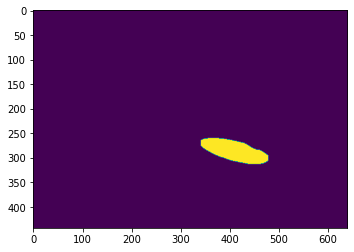

In [87]:
from detectron2.engine import DefaultTrainer
from detectron2.data import MetadataCatalog
from detectron2.data import DatasetCatalog
from module.segmentation_package.src.utils import split_ds

for d in ["Train", "Test"]:
    DatasetCatalog.register("fishial_" + d, lambda d=d: split_ds(data_full, d))
    MetadataCatalog.get("fishial_" + d).set(thing_classes=["fish"], evaluator_type="coco")

AssertionError: Dataset 'fishial_Train' is already registered!

In [88]:
cfg.DATASETS.TRAIN = ("fishial_Train", )
cfg.DATASETS.TEST = ("fishial_Test", )
trainer = DefaultTrainer(cfg)

[11/02 14:37:41 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[11/02 14:37:41 d2.data.build]: Removed 2 images with no usable annotations. 30998 images left.
[11/02 14:37:41 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|    fish    | 39202        |
|            |              |
[11/02 14:37:41 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[11/02 14:37:41 d2.data.build]: Using training sampler TrainingSampler
[11/02 14:37:41 d2.data.common]: Serializing 30998 elements to byte tensors and concatenating them all ...
[11/02 14:37:42 d2.data.common]: Serialized dataset takes 92.40 MiB


In [92]:
trainer.model

GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2): Sequential(
        (0): BottleneckBlock

In [94]:
pred.model.load_state_dict(trainer.model.state_dict())

<All keys matched successfully>

In [97]:
cfg.DATALOADER.NUM_WORKERS

4